## Import all the Library


In [6]:
# Import all the required library
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import *

import warnings
warnings.filterwarnings('ignore')

from fastai.imports import *

import pandas as pd

## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## STEP to train YOLOV4 Model

1.Download the YoloV4.To download open YOLOV4 git and click on download->download zip. After downloading extract the file

2.Now we have to make changes to the file we have downloaded,This include steps as follows

*   Open darknet-master folder and from that open cfg folder now in the cfg folder make a copy of the file yolo4-custom.cfg now rename the copy file to yolo-obj.cfg
* Open the file yolo-obj.cfg and change max_batches to 12000.

*   Then change the line steps to (0.8*max_batches ,0.9*max_batches) ie;steps=9600,10800.
*   Download the pre trained weights from the link yolov4.conv.137 and save it in the darknet-master folder

*   Take batch equal to 64 and subdivision equal to 16
*   Change width and height equal to 416 
*   Changes classes equal to 3 and filter equal to 24 in config file
*   Open wordpad and type the name of each classes in separate lines and save the file as obj.names in darknet-master->data folder
*   Create file obj.data in the folder darknet-master->data, containing the given text
  
  classes= 3
  
  train  = data/train.txt

  valid = data/text.txt

  names = data/obj.names

  backup = backup/

*   Create a folder in the directory darknet-master->data->obj ,inside this obj folder put all your images and the respective txt files 

*   In the darknet-master folder open Makefile in wordpad and change GPU=1,CUDNN=1,OPENCV=1 

3.All the above step are performed in local .Once done upload the darknet folder to google drive 













C**hange the current directory to darknet-master folder**

In [7]:
%cd "/content/drive/My Drive/Opencv_images/darknet-master/"

/content/drive/My Drive/Opencv_images/darknet-master


**Check the current directory**

In [9]:
os.getcwd()

'/content/drive/My Drive/Opencv_images/darknet-master'

**About Dataset**
1.   The dataset is about the chess board 
2.   To predict three classes in the chessboard knight,pawn ,rook



**We have to create a train.txt file.This file directs to all training images as shown in the below picture**



*   Change the directory to the train folder where images are present
*   Fetch each file from the folder.
*   The images are having many extension so we will check if the fetch file is having extension end with ".jpg", ".jpeg", ".png", ".PNG", ".JPG" than append it in the list
*   Save the list in train.txt file inside the data folder





In [8]:
import os
 
image_files = []
os.chdir(os.path.join("data", "train"))
fileExtensions = (".jpg", ".jpeg", ".png", ".PNG", ".JPG")
for filename in os.listdir(os.getcwd()):
  if filename.endswith(fileExtensions):
    image_files.append("data/train/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
  for image in image_files:
    outfile.write(image)
    outfile.write("\n")
  outfile.close()
os.chdir("..")

In [3]:
import os
 
image_files = []
os.chdir(os.path.join("data", "test"))
fileExtensions = (".jpg", ".jpeg", ".png", ".PNG", ".JPG")
for filename in os.listdir(os.getcwd()):
  if filename.endswith(fileExtensions):
    image_files.append("data/test/" + filename)
os.chdir("..")
with open("test.txt", "w") as outfile:
  for image in image_files:
    outfile.write(image)
    outfile.write("\n")
  outfile.close()
os.chdir("..")

**Compile darknet by using following code**

In [5]:
!make
!chmod +x ./darknet 

chmod +x *.sh


**Install Unix to Convert file**

In [6]:
!sudo apt install dos2unix

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 351 kB of archives.
After this operation, 1,267 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 dos2unix amd64 7.3.4-3 [351 kB]
Fetched 351 kB in 0s (4,798 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preco

**Install train.txt,obj.data,obj.names and yolov4-obj.cfg file**

In [7]:
!dos2unix ./data/train.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolov4-obj.cfg  

dos2unix: converting file ./data/train.txt to Unix format...
dos2unix: converting file ./data/obj.data to Unix format...
dos2unix: converting file ./data/obj.names to Unix format...
dos2unix: converting file ./cfg/yolov4-obj.cfg to Unix format...


## Train the Model and find MAP on the validation dataset

In [18]:
! ./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov4-obj
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354

KeyboardInterrupt: ignored

The model was trained and stopped at 1600 batches .So we have run the model again with the last saved weight and run for few more batches .As in 1600 batches the model itself is having very low loss so we find the MAP with that weight

In [9]:
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg backup/yolov_4-obj_last.weights -dont_show -map

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    2

Lets try to find map with the 1600 batch size 

**Find the MAP on the validation data**


In [17]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg backup/yolov_4-obj_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 ro

The MAP is coming as 92.59%

## Prediction on test data

**Create a function that will take image as an input and plot the image with the object detected and their score**

In [11]:
def imShow(path):
 import cv2
 import matplotlib.pyplot as plt
 %matplotlib inline
 
 image = cv2.imread(path)
 height, width = image.shape[:2]
 resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
 
 fig = plt.gcf()
 fig.set_size_inches(18, 10)
 plt.axis("off")
 plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
 plt.show()

**Call the below code to predict the image and pass the image to predict**

In [11]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg backup/yolov4-obj_last.weights data/image1.jpg -thresh 0.3 


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 ro

Call the imshow function and pass the prediction.jpg image

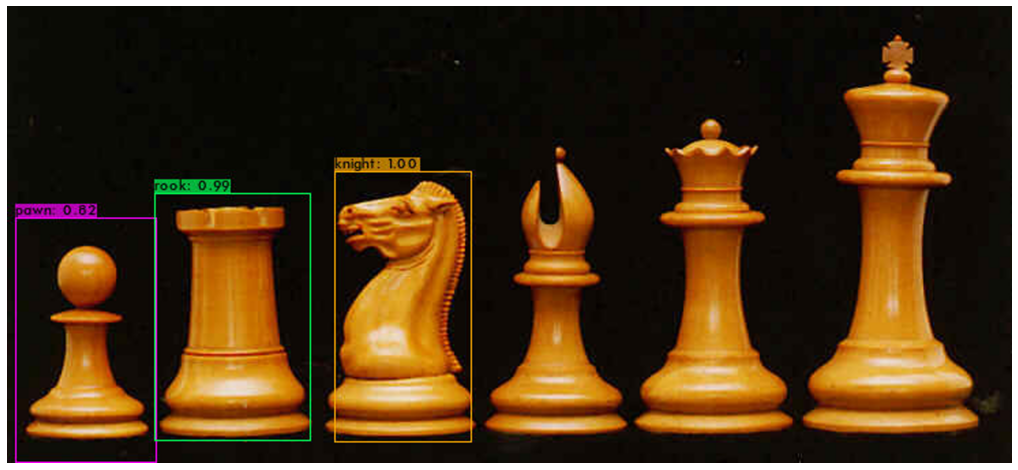

In [12]:
imShow('predictions.jpg')

From the above result we can see that all the three classes are predicted correctly

**Lets predict on some other image **

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   9 ro

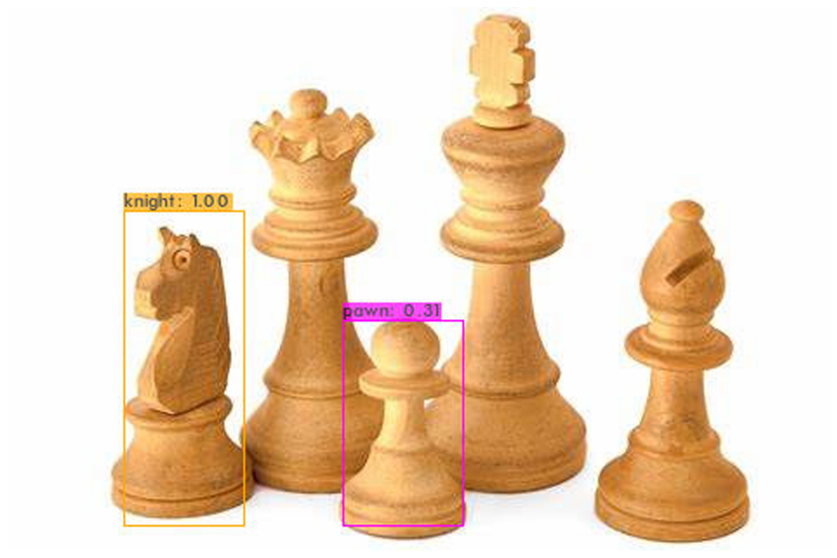

In [14]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg backup/yolov_4-obj_last.weights data/image3.jpg -thresh 0.3 
imShow('predictions.jpg')